In [1]:
from pycaret.classification import *
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
model_viewer = models()
model_viewer

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [4]:
setter = setup(data=df, target="species", train_size=0.7)

Setup Succesfully Completed!


,Description,Value
0,session_id,1554
1,Target Type,Multiclass
2,Label Encoded,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
3,Original Data,"(344, 7)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
get_config("X_train")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,sex_not_available
216,43.5,18.1,202.0,3400.0,0.0,1.0,0.0,1.0,0.0,0.0
275,45.0,15.4,220.0,5050.0,1.0,0.0,0.0,0.0,1.0,0.0
290,47.7,15.0,216.0,4750.0,1.0,0.0,0.0,1.0,0.0,0.0
8,34.1,18.1,193.0,3475.0,0.0,0.0,1.0,0.0,0.0,1.0
10,37.8,17.1,186.0,3300.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
219,50.2,18.7,198.0,3775.0,0.0,1.0,0.0,1.0,0.0,0.0
81,42.9,17.6,196.0,4700.0,0.0,0.0,1.0,0.0,1.0,0.0
169,58.0,17.8,181.0,3700.0,0.0,1.0,0.0,1.0,0.0,0.0
13,38.6,21.2,191.0,3800.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
base_models = compare_models(n_select=3, fold=5, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9917,0.0000,0.9902,0.9923,0.9917,0.9869,0.9872,0.0665
1,Extra Trees Classifier,0.9875,0.0000,0.9864,0.9879,0.9876,0.9803,0.9804,0.1365
2,Logistic Regression,0.9875,0.0000,0.9829,0.9883,0.9874,0.9802,0.9807,0.0267
3,Linear Discriminant Analysis,0.9875,0.0000,0.9829,0.9883,0.9874,0.9802,0.9807,0.0022
4,Random Forest Classifier,0.9833,0.0000,0.9831,0.9847,0.9834,0.9738,0.9745,0.1095
5,CatBoost Classifier,0.9833,0.0000,0.9797,0.9839,0.9833,0.9737,0.9740,1.3883
6,Ridge Classifier,0.9833,0.0000,0.9799,0.9844,0.9832,0.9737,0.9744,0.0032
7,Decision Tree Classifier,0.9792,0.0000,0.9800,0.9808,0.9793,0.9672,0.9680,0.0020
8,Gradient Boosting Classifier,0.9792,0.0000,0.9765,0.9809,0.9792,0.9672,0.9680,0.1905
9,Light Gradient Boosting Machine,0.9792,0.0000,0.9732,0.9812,0.9792,0.9672,0.9682,0.0341


In [7]:
blended_model = blend_models(estimator_list=base_models, fold=5, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9792,0.0000,0.9841,0.9812,0.9795,0.9673,0.9680
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9792,0.0000,0.9848,0.9812,0.9795,0.9672,0.9679
Mean,0.9917,0.0000,0.9938,0.9925,0.9918,0.9869,0.9872
SD,0.0102,0.0000,0.0076,0.0092,0.0101,0.0160,0.0157


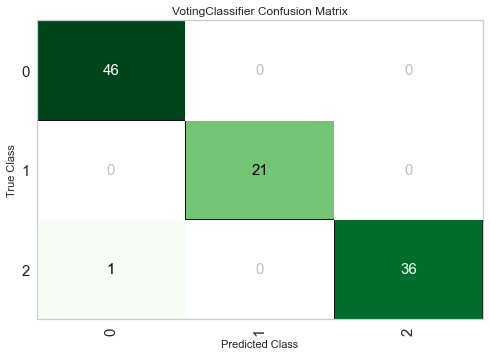

In [8]:
plot_model(blended_model, plot='confusion_matrix')

In [9]:
automizer = automl(optimize='F1')
automizer

VotingClassifier(estimators=[('Extreme Gradient Boosting_0',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estima...
                                                   warm_start=False)),
                             ('Logistic Regression_2',
                              Lo

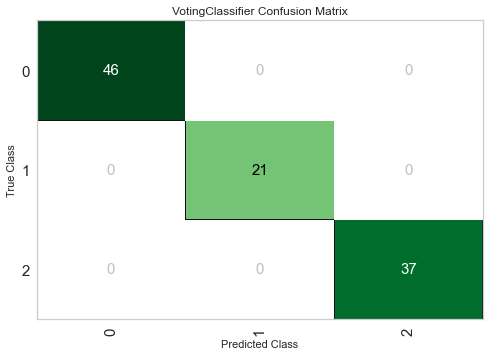

In [10]:
plot_model(automizer, plot='confusion_matrix')

# 좀 어려운거로 도전... -> satellite dataset(6435*36, multiclass)

In [11]:
from pycaret.datasets import get_data
df = get_data('satellite')
df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
6431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
6432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
6433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [12]:
setter = setup(data=df, target="Class", train_size=0.7)

Setup Succesfully Completed!


,Description,Value
0,session_id,1024
1,Target Type,Multiclass
2,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
3,Original Data,"(6435, 37)"
4,Missing Values,False
5,Numeric Features,36
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
base_models = compare_models(n_select=3, fold=5, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9205,0.0000,0.9040,0.9199,0.9198,0.9018,0.9019,0.3134
1,CatBoost Classifier,0.9165,0.0000,0.8963,0.9156,0.9153,0.8968,0.8970,7.2172
2,Extreme Gradient Boosting,0.9145,0.0000,0.8954,0.9137,0.9133,0.8943,0.8946,0.5723
3,Extra Trees Classifier,0.9121,0.0000,0.8880,0.9102,0.9098,0.8912,0.8916,0.1809
4,Gradient Boosting Classifier,0.9025,0.0000,0.8805,0.9013,0.9013,0.8795,0.8797,6.9507
5,K Neighbors Classifier,0.8990,0.0000,0.8802,0.8992,0.8986,0.8753,0.8755,0.0210
6,Random Forest Classifier,0.8917,0.0000,0.8678,0.8900,0.8902,0.8661,0.8663,0.1095
7,Decision Tree Classifier,0.8544,0.0000,0.8284,0.8552,0.8544,0.8202,0.8204,0.0439
8,Quadratic Discriminant Analysis,0.8557,0.0000,0.8056,0.8448,0.8388,0.8205,0.8234,0.0180
9,Linear Discriminant Analysis,0.8426,0.0000,0.7867,0.8372,0.8357,0.8040,0.8059,0.0181


In [20]:
blended_model = blend_models(estimator_list=base_models, fold=5, optimize='F1', method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.0000,0.9036,0.9179,0.9182,0.8998,0.8999
1,0.9223,0.0000,0.9090,0.9230,0.9225,0.9041,0.9042
2,0.9134,0.0000,0.8909,0.9119,0.9114,0.8929,0.8933
3,0.9201,0.0000,0.8995,0.9200,0.9192,0.9011,0.9014
4,0.9278,0.0000,0.9037,0.9258,0.9251,0.9105,0.9110
Mean,0.9205,0.0000,0.9013,0.9197,0.9193,0.9017,0.9019
SD,0.0047,0.0000,0.0060,0.0047,0.0046,0.0058,0.0058


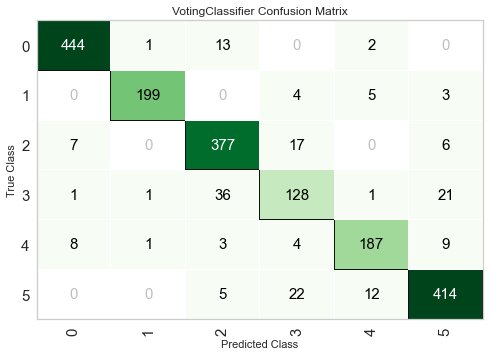

In [21]:
plot_model(blended_model, plot='confusion_matrix')

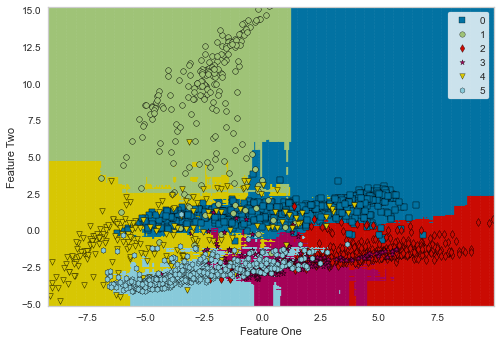

In [26]:
plot_model(blended_model, plot='boundary')

In [22]:
automizer = automl(optimize='F1')
automizer

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1024, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

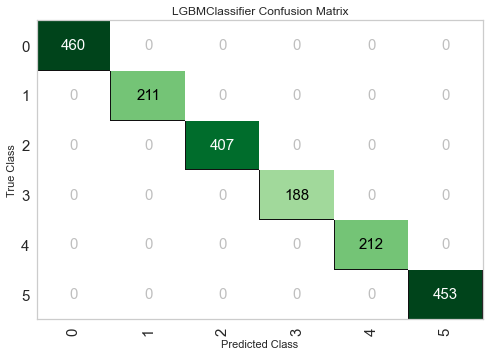

In [24]:
plot_model(automizer, plot='confusion_matrix')

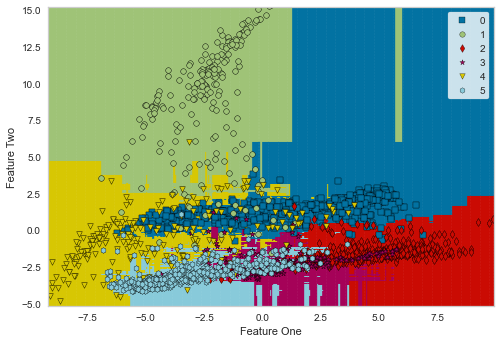

In [27]:
plot_model(automizer, plot='boundary')